<div style="text-align:center; background-color:blue; padding:10px;">
  <h1 style="color:white;">EDA</h1>
</div>
<br>

<div style="text-align:left; background-color:gray; padding:0px;">
  <h1 style="color:white;">Import des librairies</h1>
</div>
<br>

In [1]:
# Visualisation de données
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

# Librairies pour la connection à rds
# from connection import connection_with_sqlalchemy

<div style="text-align:left; background-color:gray; padding:0px;">
  <h1 style="color:white;">Récupération des données sur RDS</h1>
</div>
<br>

In [2]:
#///////////////////////////////////////////////////////////////////////////////
#           A FAIRE UNE SEULE FOIS LORS DU LANCEMENT DU NOTEBOOK
#///////////////////////////////////////////////////////////////////////////////

In [3]:
# Utilisation de sqlalchemy pour charger les données datagouv dans RDS
#Création de la connection

# engine = connection_with_sqlalchemy("datagouv")

# query="""
# SELECT 
#     V.*,
#     T.NAME_TYPE_BIEN,
#     C.NAME_COMMUNE,
#     D.Name_departement,
#     R.Name_region
# FROM VENTES V
# INNER JOIN TYPES_BIENS as T ON V.ID_TYPE_BIEN = T.ID_TYPE_BIEN
# INNER JOIN COMMUNES AS C ON V.ID_COMMUNE = C.ID_COMMUNE
# INNER JOIN DEPARTEMENTS AS D ON C.ID_DEPT = D.ID_DEPT
# INNER JOIN REGIONS R ON D.ID_REGION = R.ID_REGION;
# """
# df = pd.read_sql(query, engine)
# df.head(10)

In [2]:
# Fermeture de la connection
# engine.dispose()

In [5]:
# Sauvegarde du data frame en csv pour éviter de requêter toute la table plusieurs fois
# df.to_csv('datas_rds.csv', index=False)

<div style="text-align:left; background-color:gray; padding:0px;">
  <h1 style="color:white;">Visualisation des données disponibles RDS</h1>
</div>
<br>

In [6]:
df = pd.read_csv("datas_rds.csv", low_memory=False)
df.head()

ID_VENTE  MONTANT  NUMERO_RUE                 RUE  CODE_POSTAL  LONGITUDE  \
0    319322   450000         493    RTE DES GARAUDES         1400   4.920458   
1    332279   270600         487      CHE DU SORBIER         1400   4.927372   
2    336158   172000         258   RUE DE MUNETVILLE         1400   4.923902   
3    365184   131500          48  RTE DE LA FONTAINE         1400   4.919941   
4    388374   247000           8      IMP DES CHENES         1400   4.921868   

    LATITUDE DATE_MUTATION  SURFACE_BATI  NB_PIECES  SURFACE_TERRAIN  \
0  46.133160    2018-07-26           233          6            10800   
1  46.137914    2018-07-30           140          5             9074   
2  46.150990    2018-08-08            88          4              600   
3  46.151171    2018-09-20            81          3                0   
4  46.149648    2018-10-23           159          5              977   

   DEPENDANCES  ID_TYPE_BIEN ID_COMMUNE NAME_TYPE_BIEN  \
0            0             2      01001         Maison   
1            0             2      01001         Maison   
2            0             2      01001         Maison   
3            1             1      01001    Appartement   
4            0             2      01001         Maison   

              NAME_COMMUNE Name_departement           Name_region  
0  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes  
1  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes  
2  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes  
3  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes  
4  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes

In [7]:
print("Nombre de ventes dans le data frame : ", df.shape[0])

Nombre de ventes dans le data frame :  4205071


In [28]:
date_min = str(df.DATE_MUTATION.min()).split()[0]
date_max = str(df.DATE_MUTATION.max()).split()[0]
print(f"Le jeu de données s'étends entre le {date_min} et le {date_max}")

Le jeu de données s'étends entre le 2018-07-01 et le 2022-12-31


In [8]:
# Retrait des colonnes inutiles 
df = df.drop(columns=["ID_VENTE", "ID_TYPE_BIEN"])
# Recherche du nombre de lignes identiques
print(f"Il y a {df.duplicated().sum()} ligne(s) identique(s)")

Il y a 9 ligne(s) identique(s)


In [9]:
# Suppression des lignes identiques
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4205062 entries, 0 to 4205070
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MONTANT           int64  
 1   NUMERO_RUE        int64  
 2   RUE               object 
 3   CODE_POSTAL       int64  
 4   LONGITUDE         float64
 5   LATITUDE          float64
 6   DATE_MUTATION     object 
 7   SURFACE_BATI      int64  
 8   NB_PIECES         int64  
 9   SURFACE_TERRAIN   int64  
 10  DEPENDANCES       int64  
 11  ID_COMMUNE        object 
 12  NAME_TYPE_BIEN    object 
 13  NAME_COMMUNE      object 
 14  Name_departement  object 
 15  Name_region       object 
dtypes: float64(2), int64(7), object(7)
memory usage: 545.4+ MB


In [11]:
df['DATE_MUTATION'] = pd.to_datetime(df['DATE_MUTATION'])

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Répartition des variables catégorielle</h1>
</div>
<br>

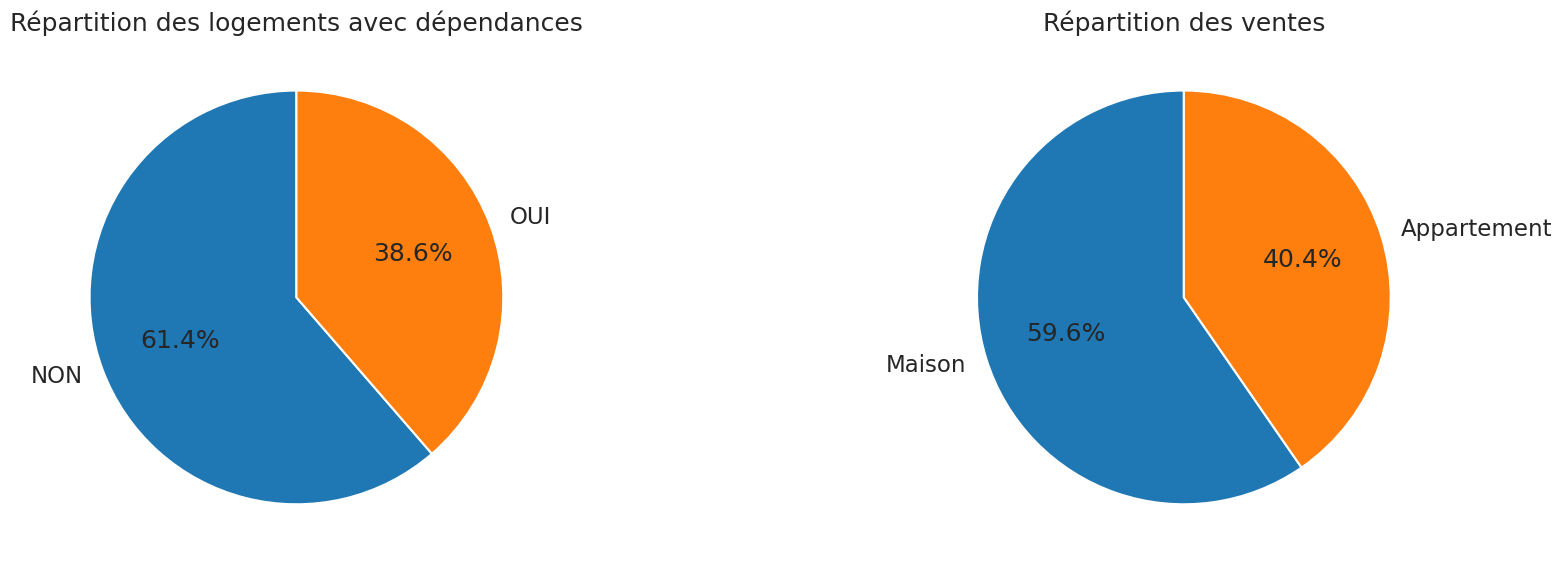

In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Répartition entre dépendance ou non
count_data = df['DEPENDANCES'].value_counts()
ax1.pie(count_data, data=df,
         labels=['NON', 'OUI'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Répartition des logements avec dépendances')

# Répartition entre Appartement et maison
count_data = df['NAME_TYPE_BIEN'].value_counts()
ax2.pie(count_data, labels=count_data.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Répartition des ventes')

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Visualisation des prix au niveau national</h1>
</div>
<br>

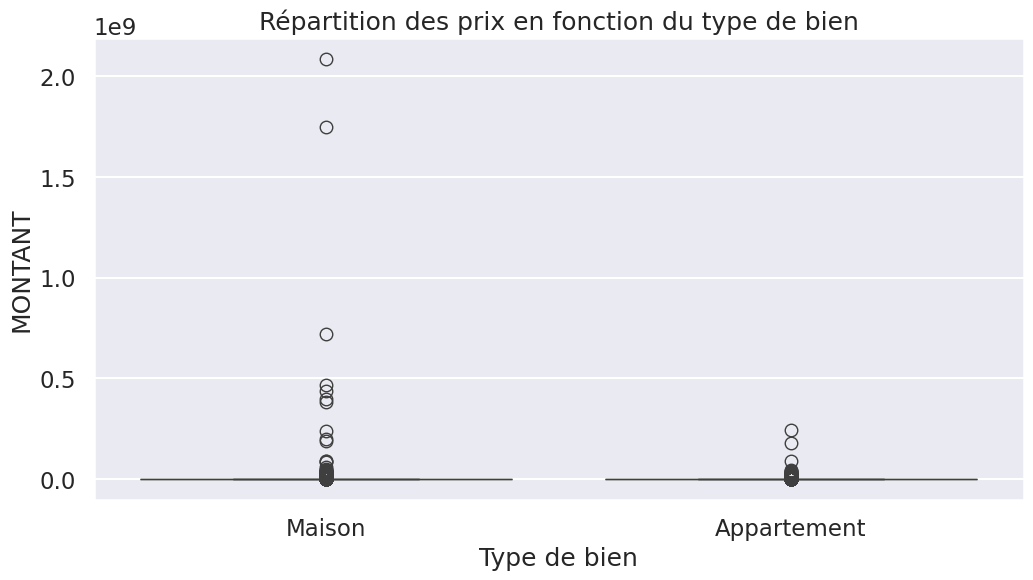

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_TYPE_BIEN', y='MONTANT', data=df)
plt.title('Répartition des prix en fonction du type de bien')
plt.xlabel("Type de bien")
plt.show()

### Conclusion : Les valeurs extreme dans le jeu de données ne permettent pas de visualiser correctement les prix avec une échelle linéaire => Visualisation avec une échelle logarithmique :

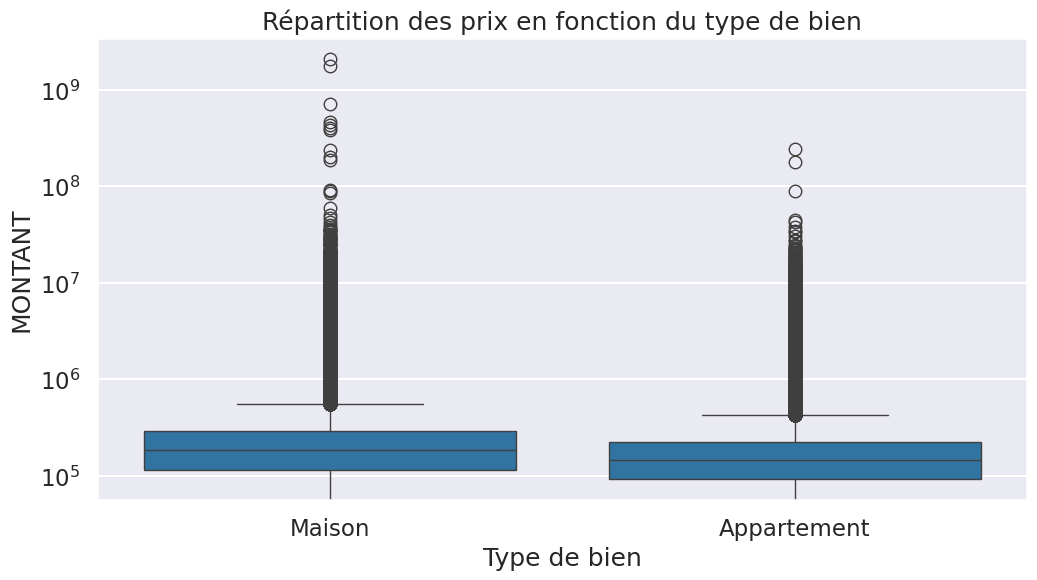

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_TYPE_BIEN', y='MONTANT', data=df)
plt.yscale("log")
plt.title('Répartition des prix en fonction du type de bien')
plt.xlabel("Type de bien")
plt.show()

In [21]:
quartil =  df['MONTANT'].quantile([0, 0.25, 0.5, 0.75, 1]).astype(int).to_list()
print(quartil)

[0, 105000, 169000, 264000, 2086000000]


##########################################################################
# Commentaires à revoir faire les calcul pour compter le nombre de biens au-dessus de 264 000€
##########################################################################
### 25% des biens en vente sont inférieurs à 105 000€
### 50% des biens sont vendus entre 105 00€ et 264 000€
### 25% des biens restants sont supérieurs à 264 000€ dont le bien le plus cher à 2 086 000 000€  

### Le bien vendu avec le prix le plus élevé entre le 1er Juillet 2018 et le 31 Décembre 2022 est le suivant :

In [23]:
df.loc[df.MONTANT==quartil[-1],:]

MONTANT  NUMERO_RUE             RUE  CODE_POSTAL  LONGITUDE  \
990229  2086000000          33  CORNIC AN HENT        29440  -4.111461   

         LATITUDE DATE_MUTATION  SURFACE_BATI  NB_PIECES  SURFACE_TERRAIN  \
990229  48.599533    2019-04-19           132          5             1539   

        DEPENDANCES ID_COMMUNE NAME_TYPE_BIEN NAME_COMMUNE Name_departement  \
990229            0      29213         Maison   Plouzévédé        Finistère   

       Name_region  
990229    Bretagne

### Il s'agit sûrement d'une erreur dans la saisie des données car 2 milliards pour une maison de 132m2 parait cher !!

## Pour voir l'évolution des prix dans le temps il faut passer par les étapes suivantes :
- Créer une colonne pour indiquer le trimestre et l'année. Exemple : 1er trimestre 2020
- Créer un jeu de données avec le montant le type de bien et la période (groupby)
- Afficher ce jeu de données à l'aide de seaborn

In [21]:
# Ajout d'une colonne trimestre pour voir l'evolution
df['Trimestre'] = df['DATE_MUTATION'].dt.to_period('Q')
display(df.head(2))
display(df.tail(2))

MONTANT  NUMERO_RUE               RUE  CODE_POSTAL  LONGITUDE   LATITUDE  \
0   450000         493  RTE DES GARAUDES         1400   4.920458  46.133160   
1   270600         487    CHE DU SORBIER         1400   4.927372  46.137914   

  DATE_MUTATION  SURFACE_BATI  NB_PIECES  SURFACE_TERRAIN  DEPENDANCES  \
0    2018-07-26           233          6            10800            0   
1    2018-07-30           140          5             9074            0   

  ID_COMMUNE NAME_TYPE_BIEN             NAME_COMMUNE Name_departement  \
0      01001         Maison  L'Abergement-Clémenciat              Ain   
1      01001         Maison  L'Abergement-Clémenciat              Ain   

            Name_region Trimestre  
0  Auvergne-Rhône-Alpes    2018Q3  
1  Auvergne-Rhône-Alpes    2018Q3

MONTANT  NUMERO_RUE                     RUE  CODE_POSTAL  LONGITUDE  \
4205069    55000          19         PAS DU TOURNEUR        97413  55.467416   
4205070   335000           1  RTE DU BRAS DES ETANGS        97413  55.469297   

          LATITUDE DATE_MUTATION  SURFACE_BATI  NB_PIECES  SURFACE_TERRAIN  \
4205069 -21.136974    2022-11-30            56          4              270   
4205070 -21.134559    2022-12-16            97          5              343   

         DEPENDANCES ID_COMMUNE NAME_TYPE_BIEN NAME_COMMUNE Name_departement  \
4205069            0      97424         Maison       Cilaos       La Réunion   
4205070            0      97424         Maison       Cilaos       La Réunion   

        Name_region Trimestre  
4205069  La Réunion    2022Q4  
4205070  La Réunion    2022Q4

### Le jeu de données évolue entre le troisième trimestre 2018 et le deuxième trimestre 2022

In [22]:
# Selection des données
df_temp = df.loc[:,['Trimestre','NAME_TYPE_BIEN','MONTANT']]
# Groupement sur la période et le type de bien
df_temp=df_temp.groupby(['Trimestre', 'NAME_TYPE_BIEN']).mean().reset_index()
# Tri du data frame par ordre croissant
df_temp = df_temp.sort_values(by='Trimestre')

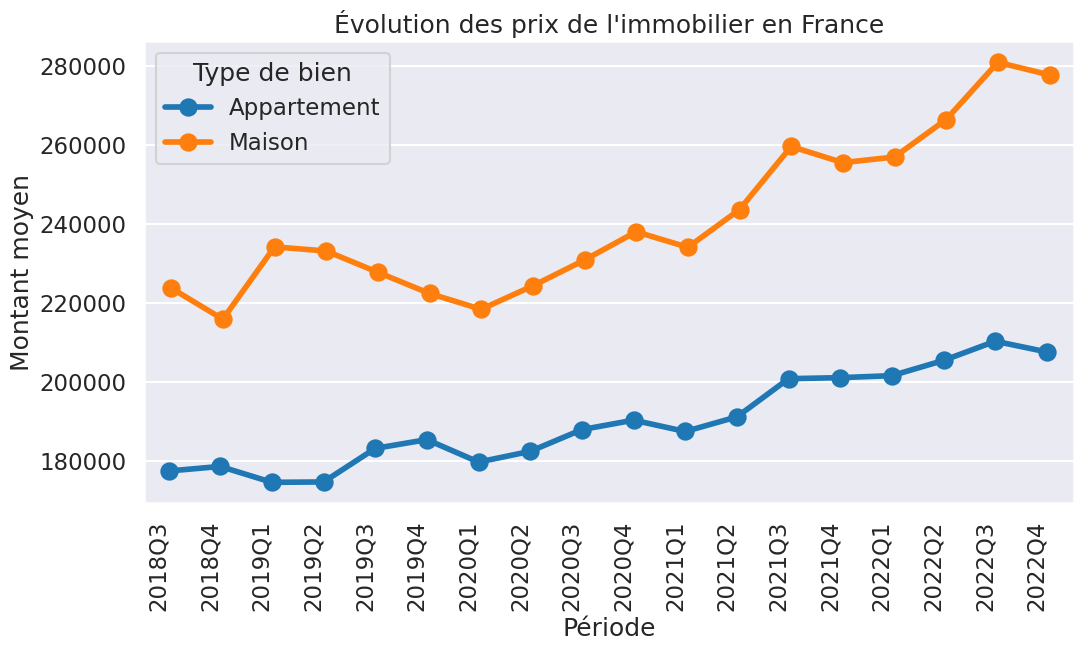

In [23]:
# Affichage avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.pointplot(data=df_temp, x='Trimestre', y='MONTANT', hue='NAME_TYPE_BIEN', 
                   dodge=True, markers='o', linestyles='-')
plt.title("Évolution des prix de l'immobilier en France")
plt.xlabel("Période")
plt.ylabel("Montant moyen")
plt.legend(title='Type de bien')
plt.xticks(rotation=90, ha="right")
plt.show()

### Conclusion : le prix augmente en fonction du temps mais pas de manière linéaire ni cyclique

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Visualisation des prix au niveau régionale</h1>
</div>
<br>

In [24]:
print(f"Il y a {df.Name_region.nunique()} region en France :")
liste_regions=df.Name_region.unique()
print(liste_regions)

Il y a 17 region en France :
['Auvergne-Rhône-Alpes' 'Hauts-de-France' "Provence-Alpes-Côte d'Azur"
 'Grand Est' 'Occitanie' 'Normandie' 'Nouvelle-Aquitaine'
 'Centre-Val de Loire' 'Bourgogne-Franche-Comté' 'Bretagne' 'Corse'
 'Pays de la Loire' 'Île-de-France' 'Guadeloupe' 'Martinique' 'Guyane'
 'La Réunion']


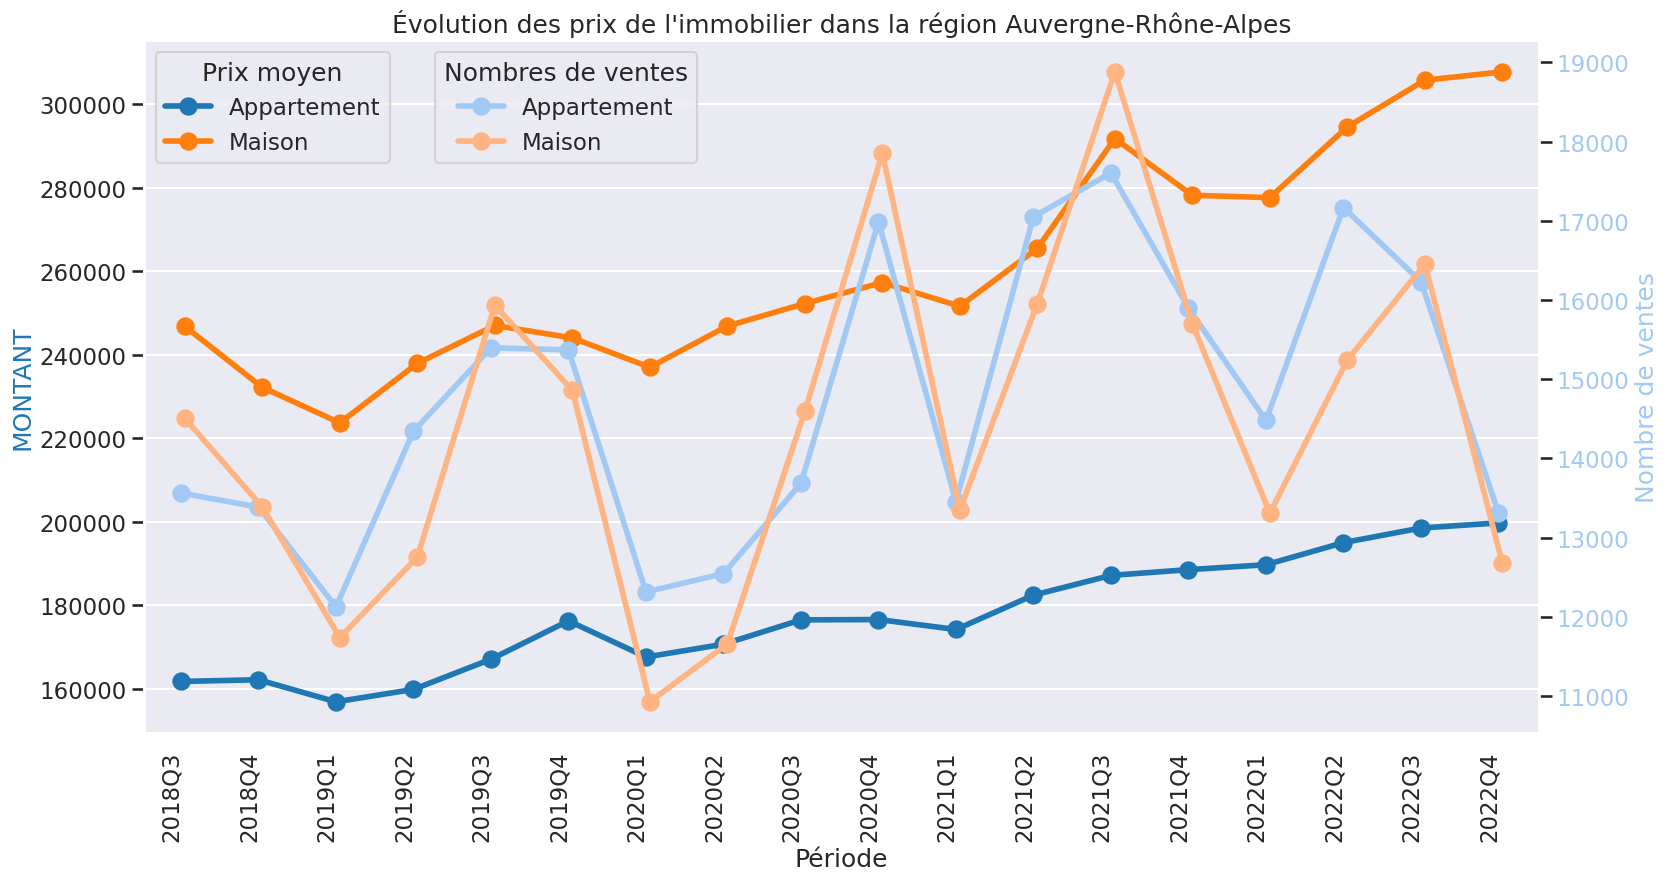

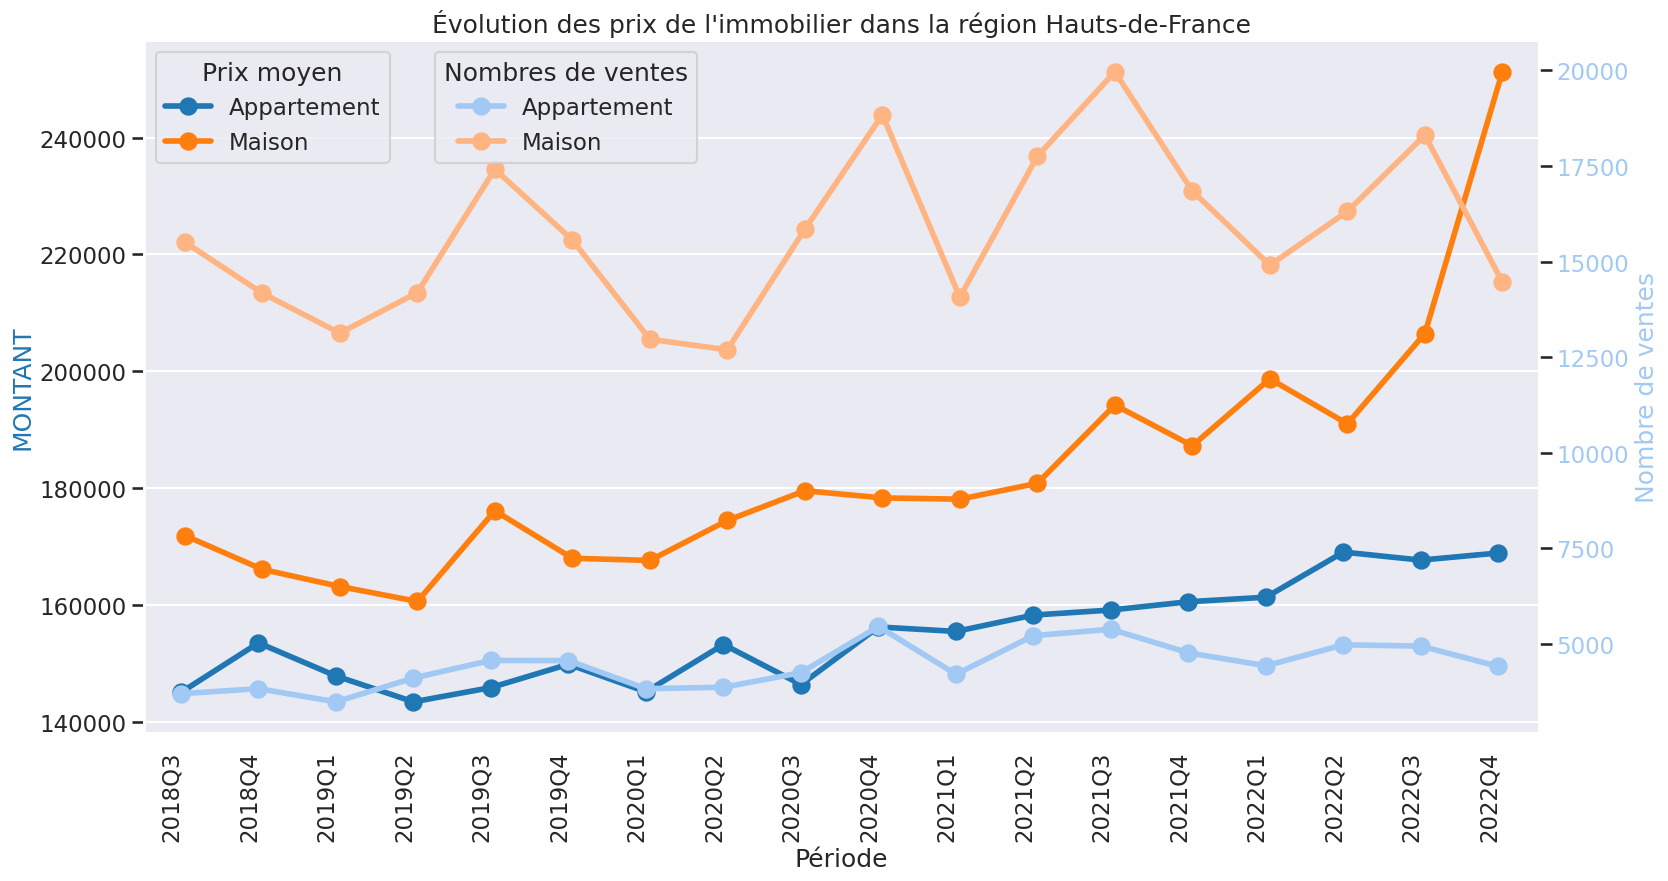

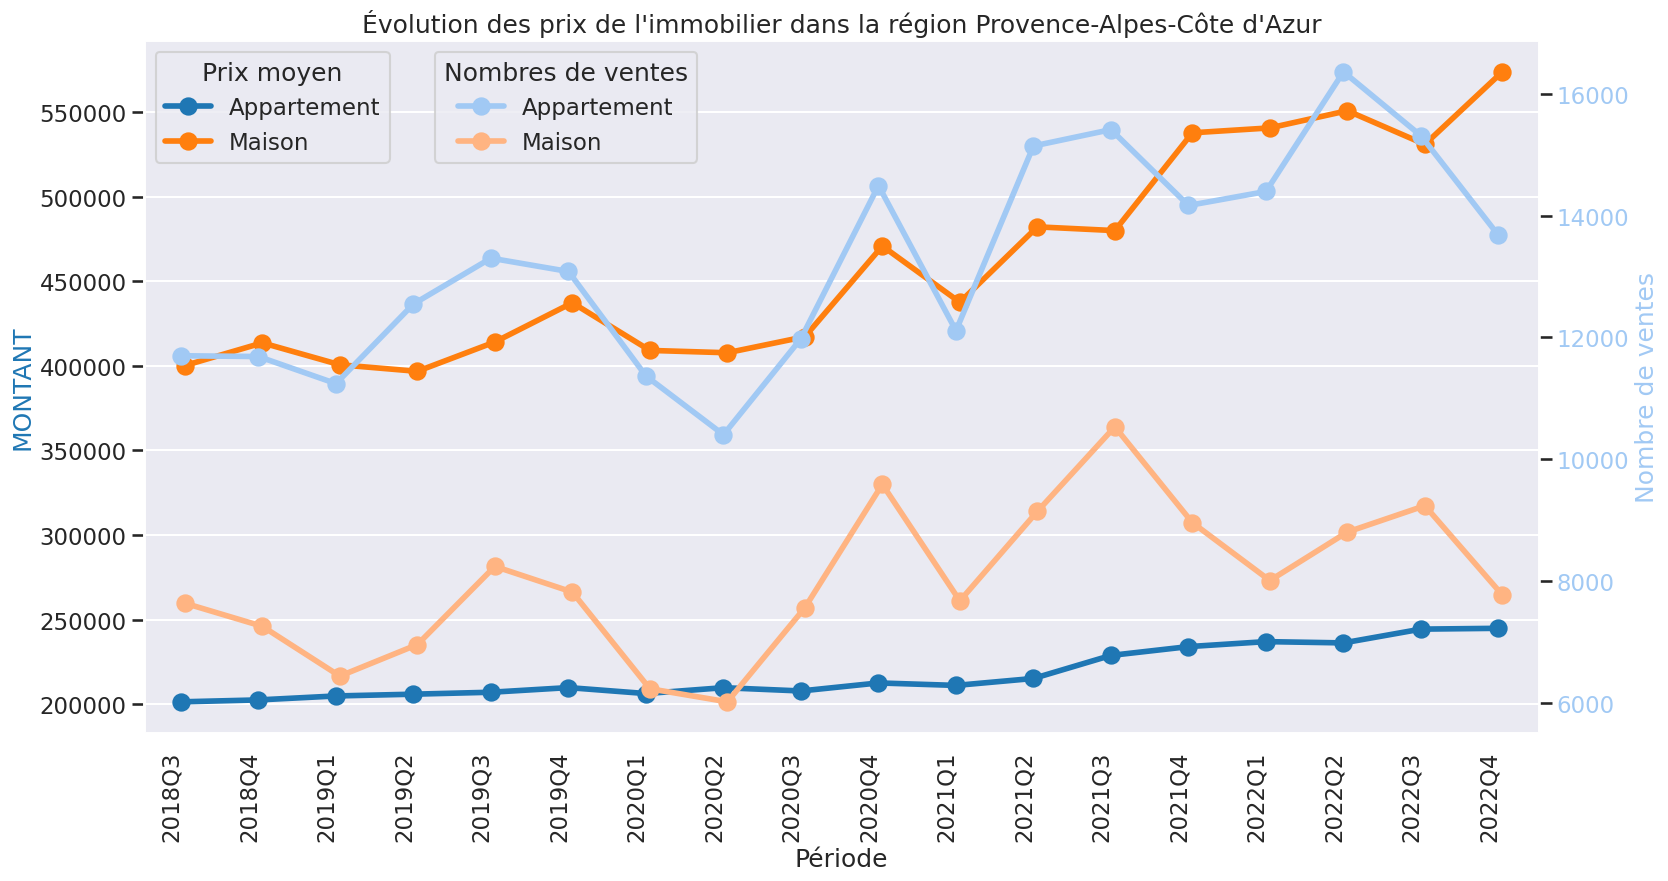

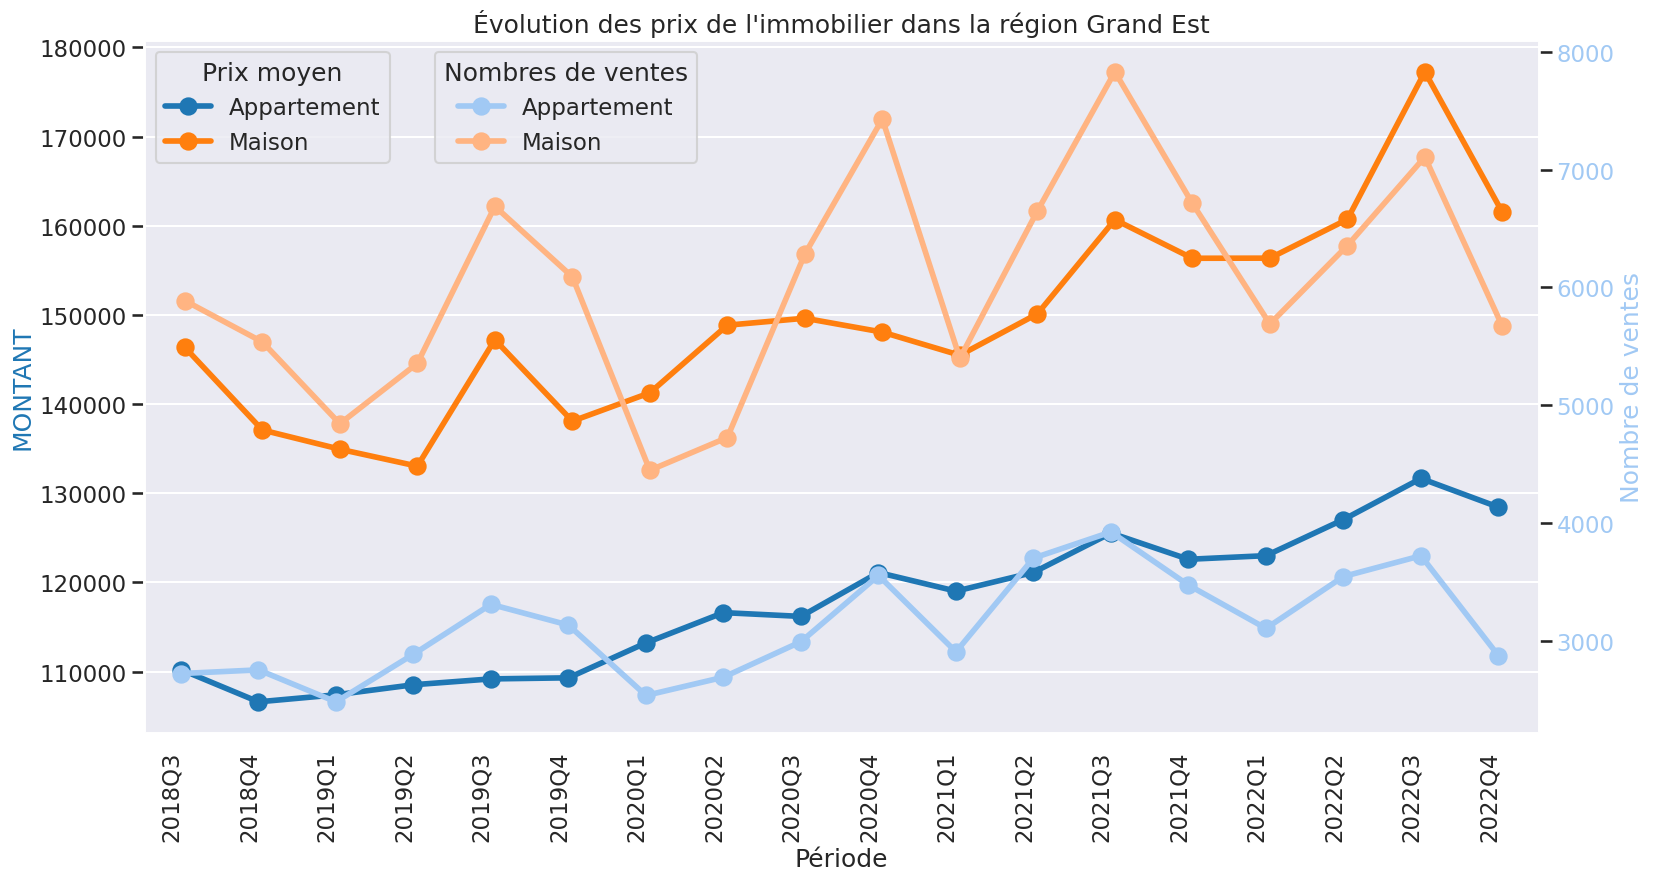

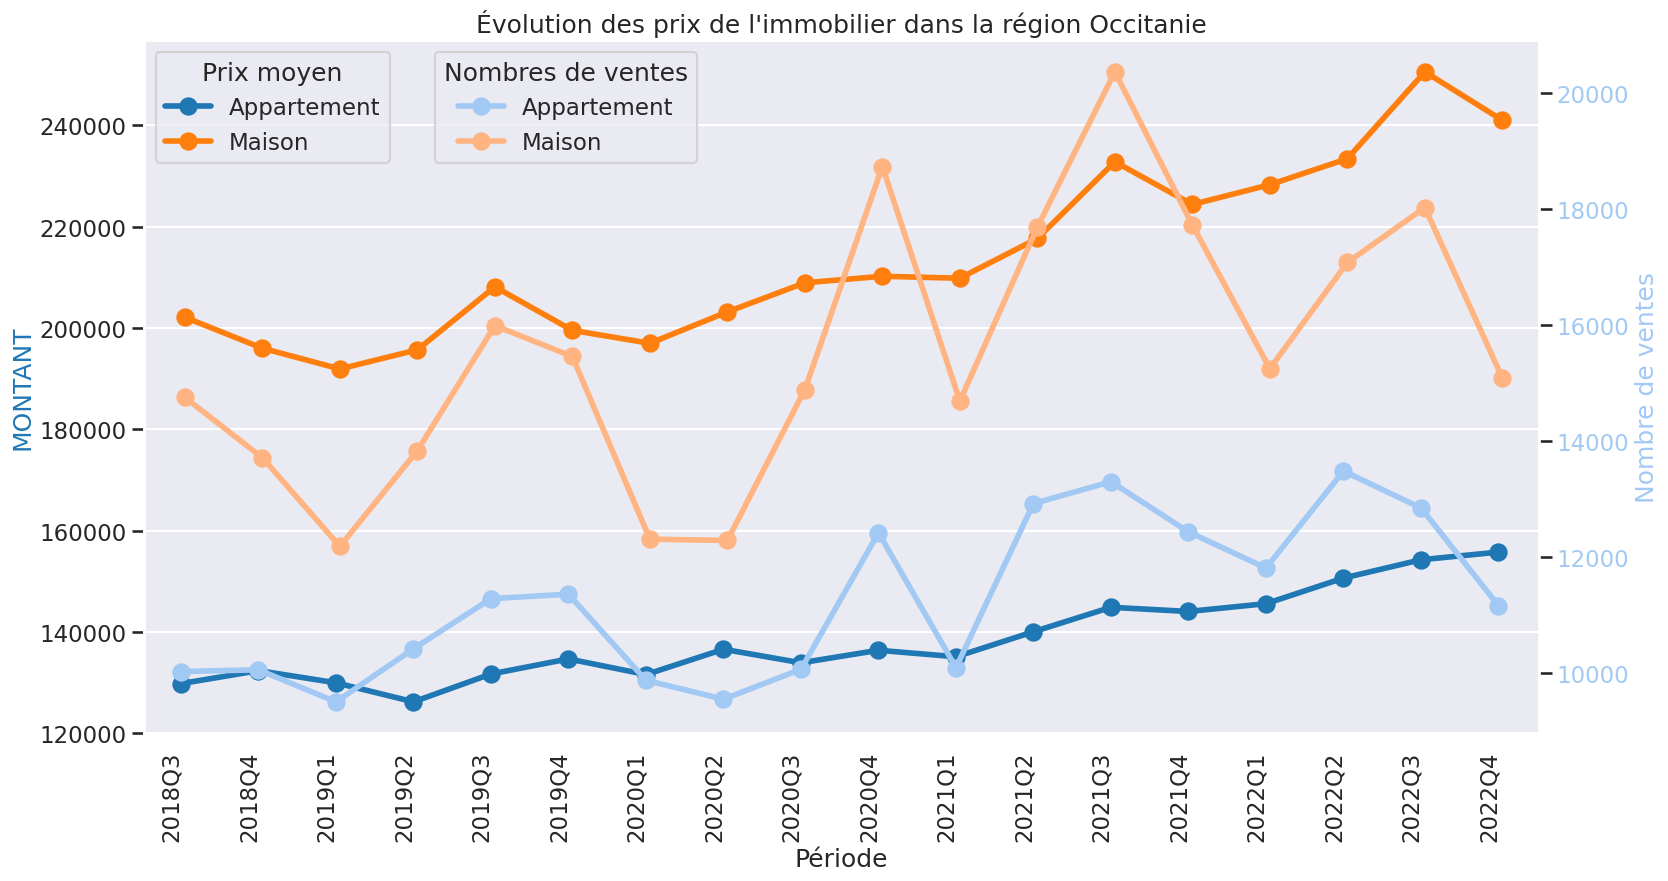

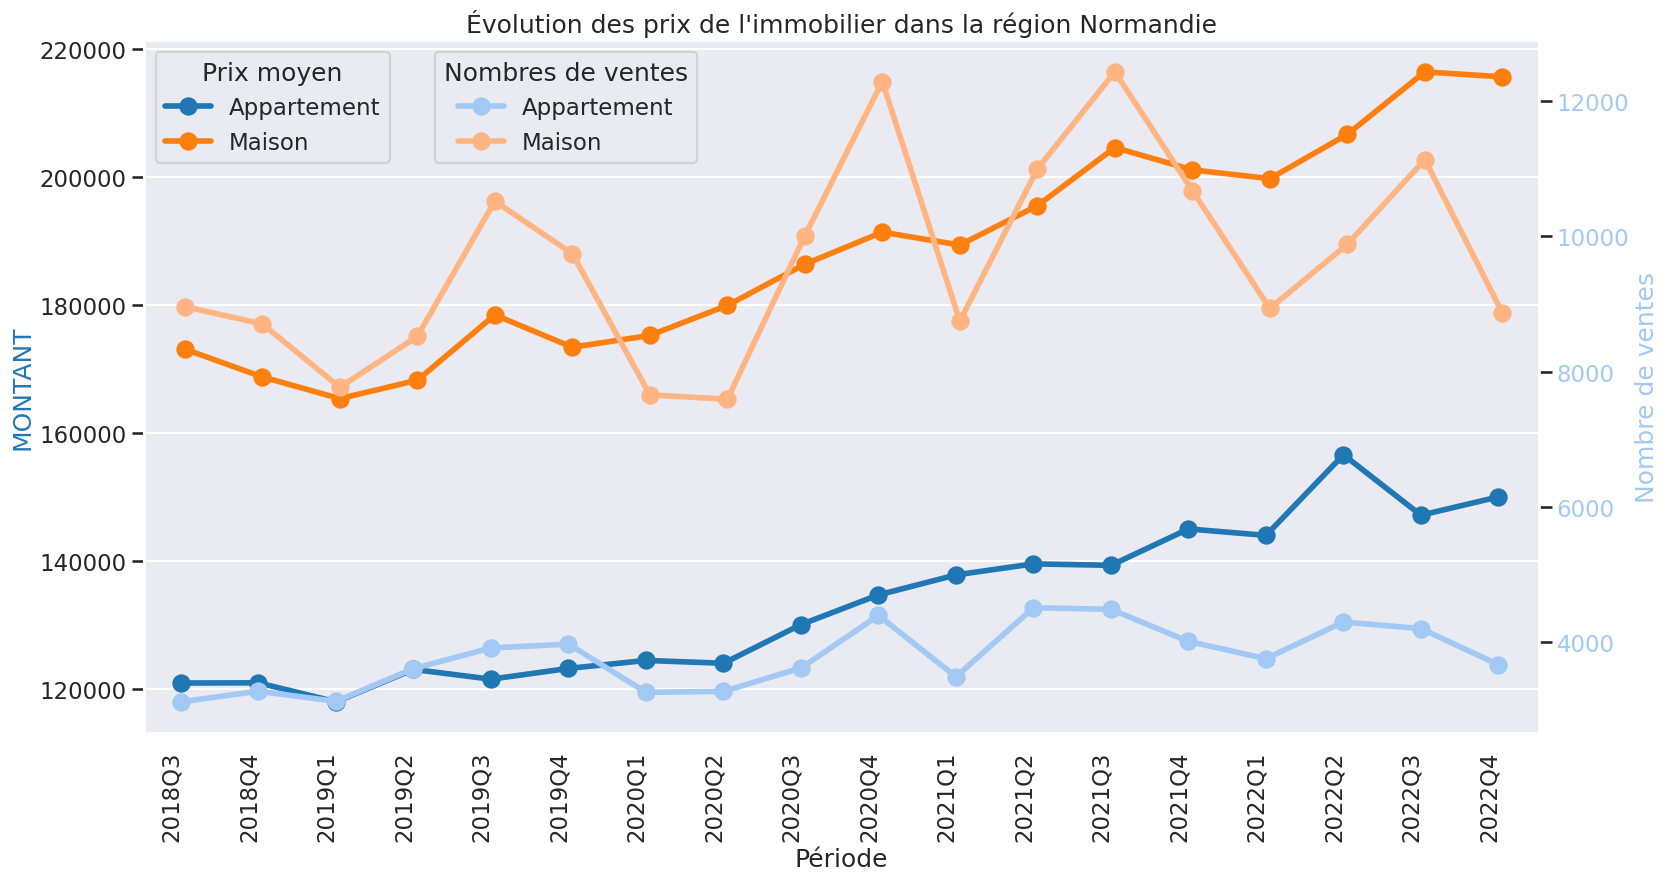

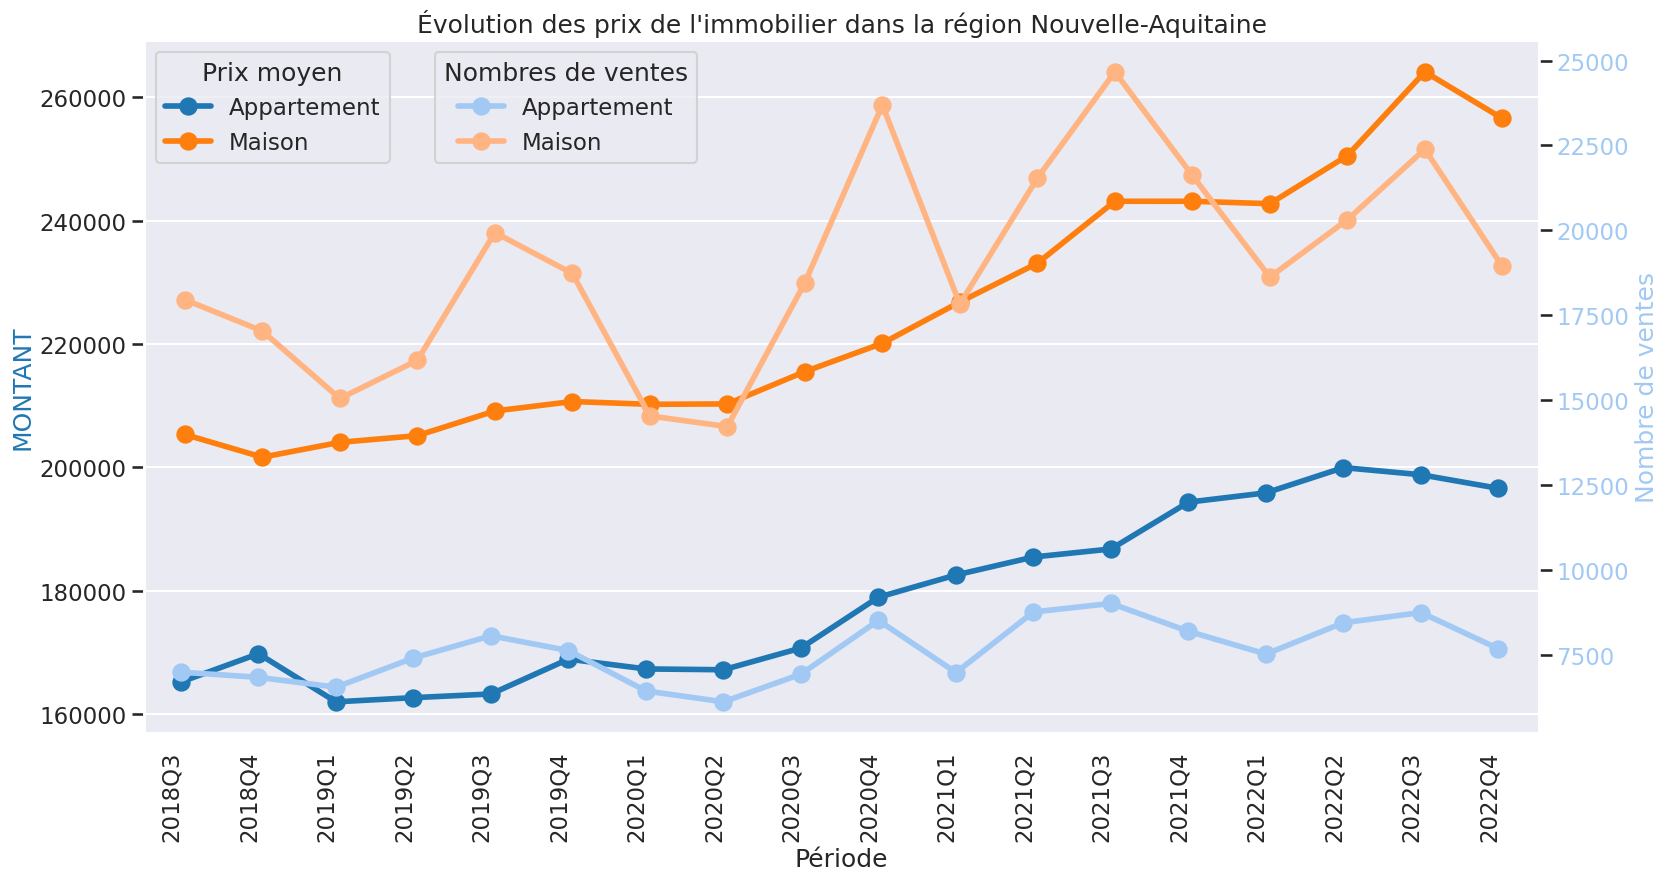

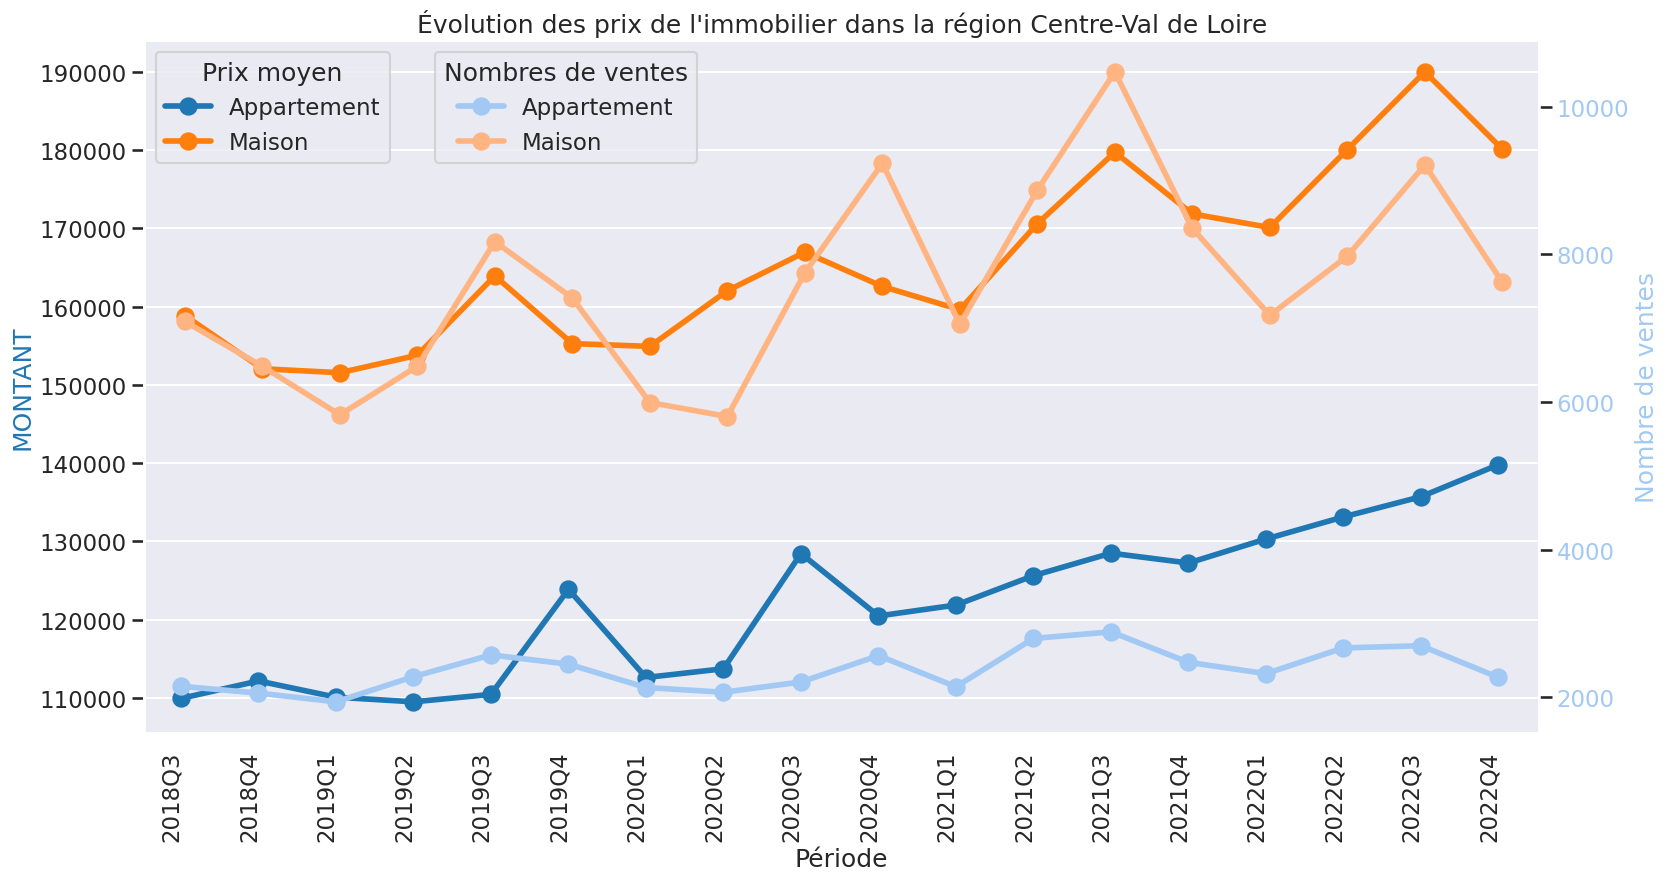

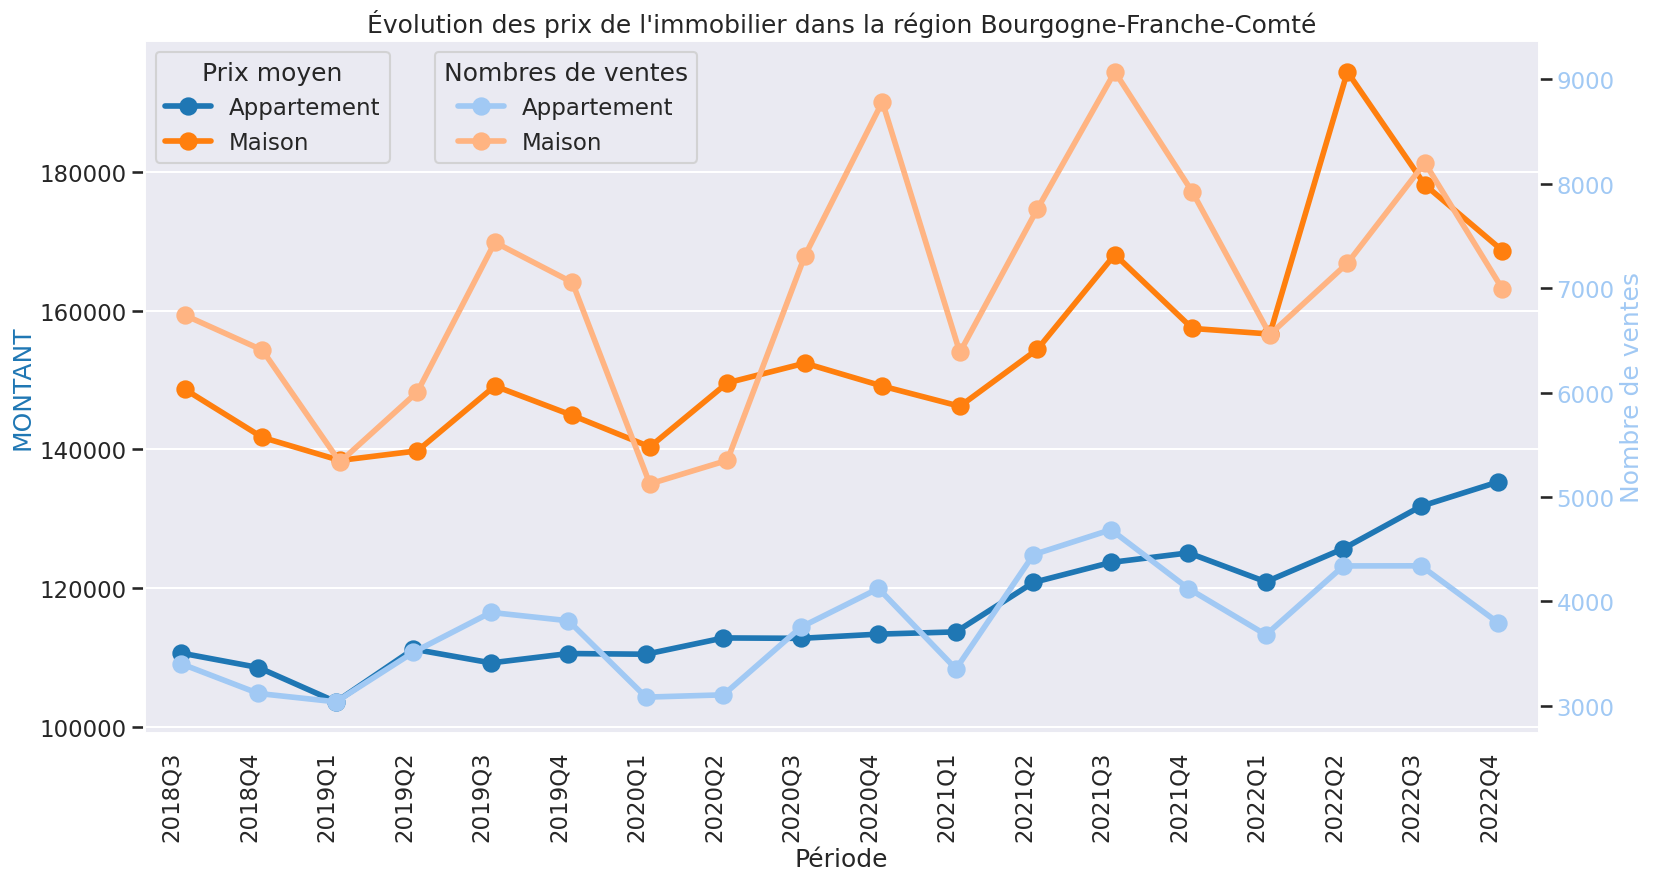

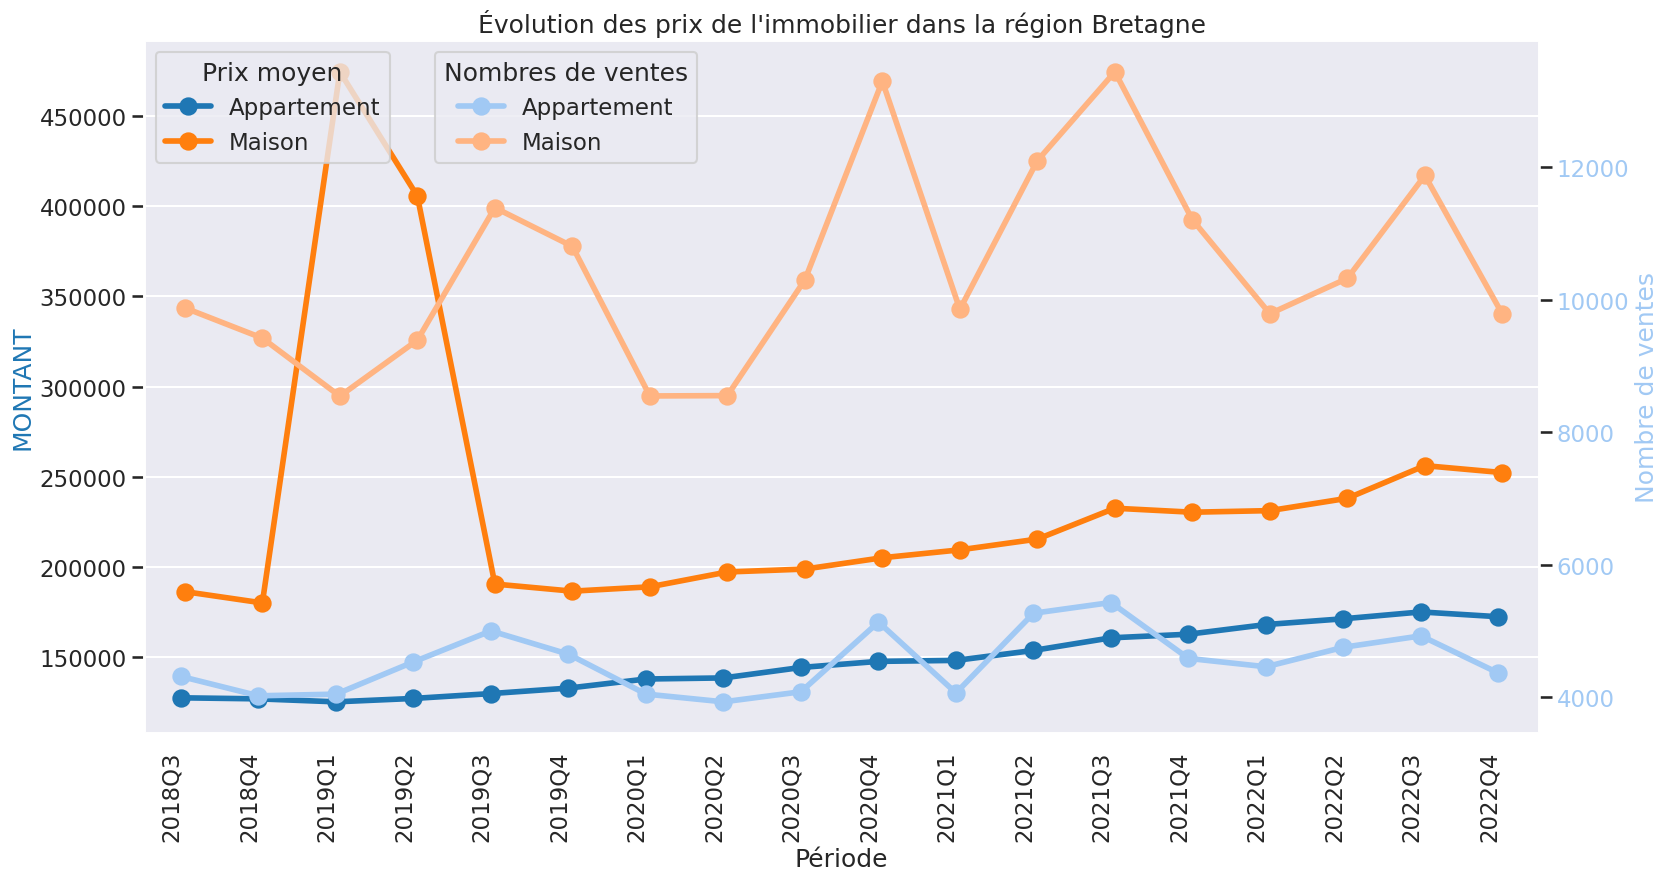

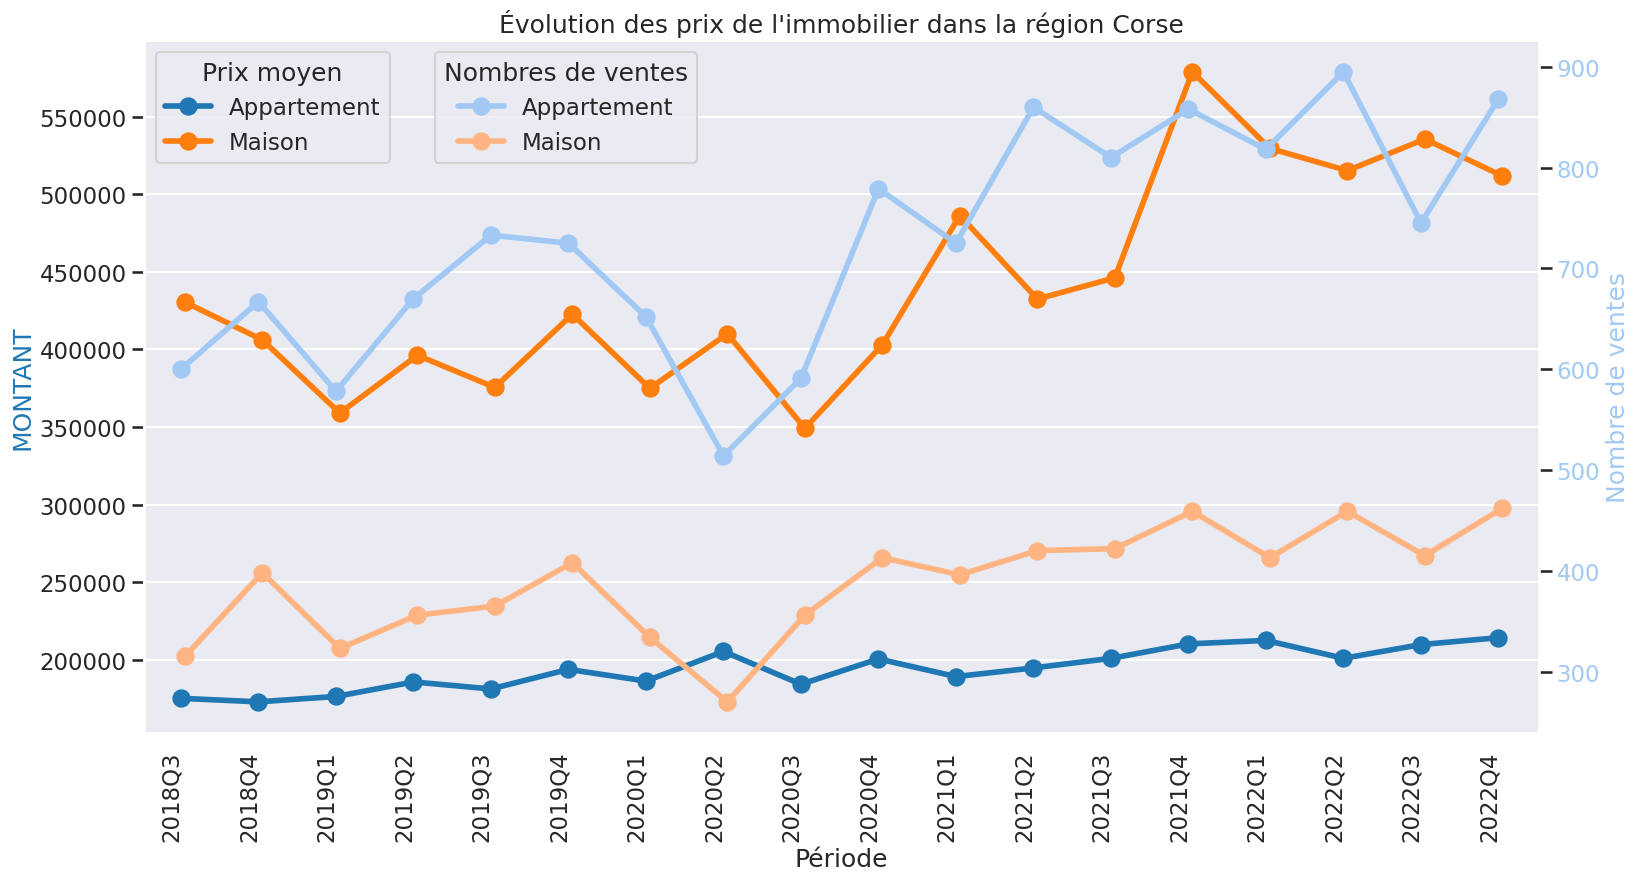

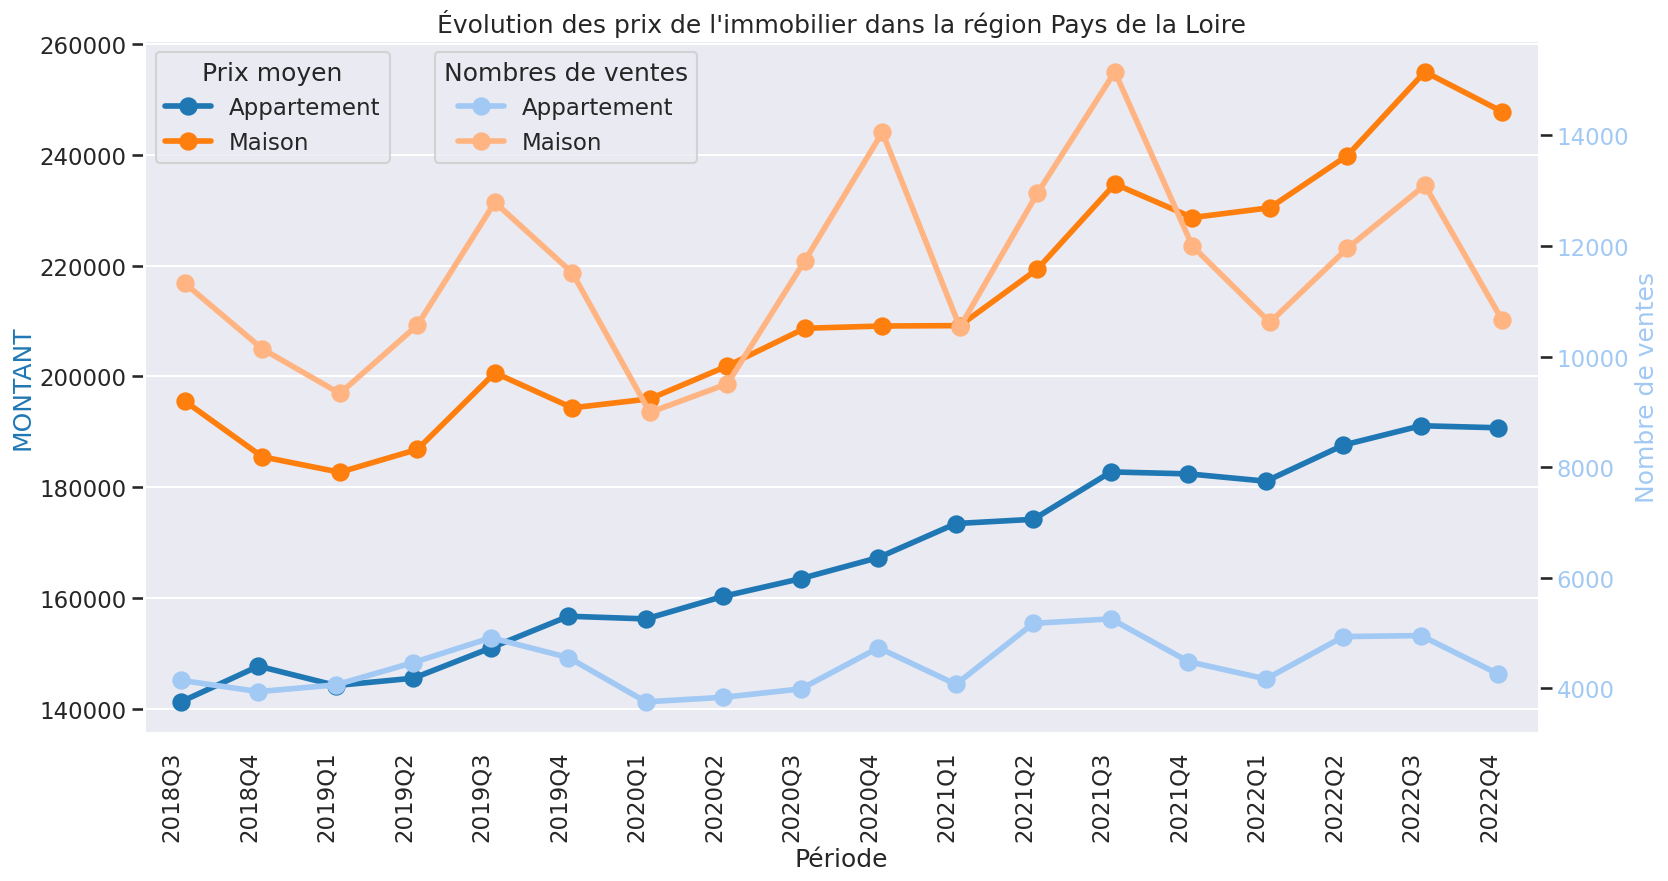

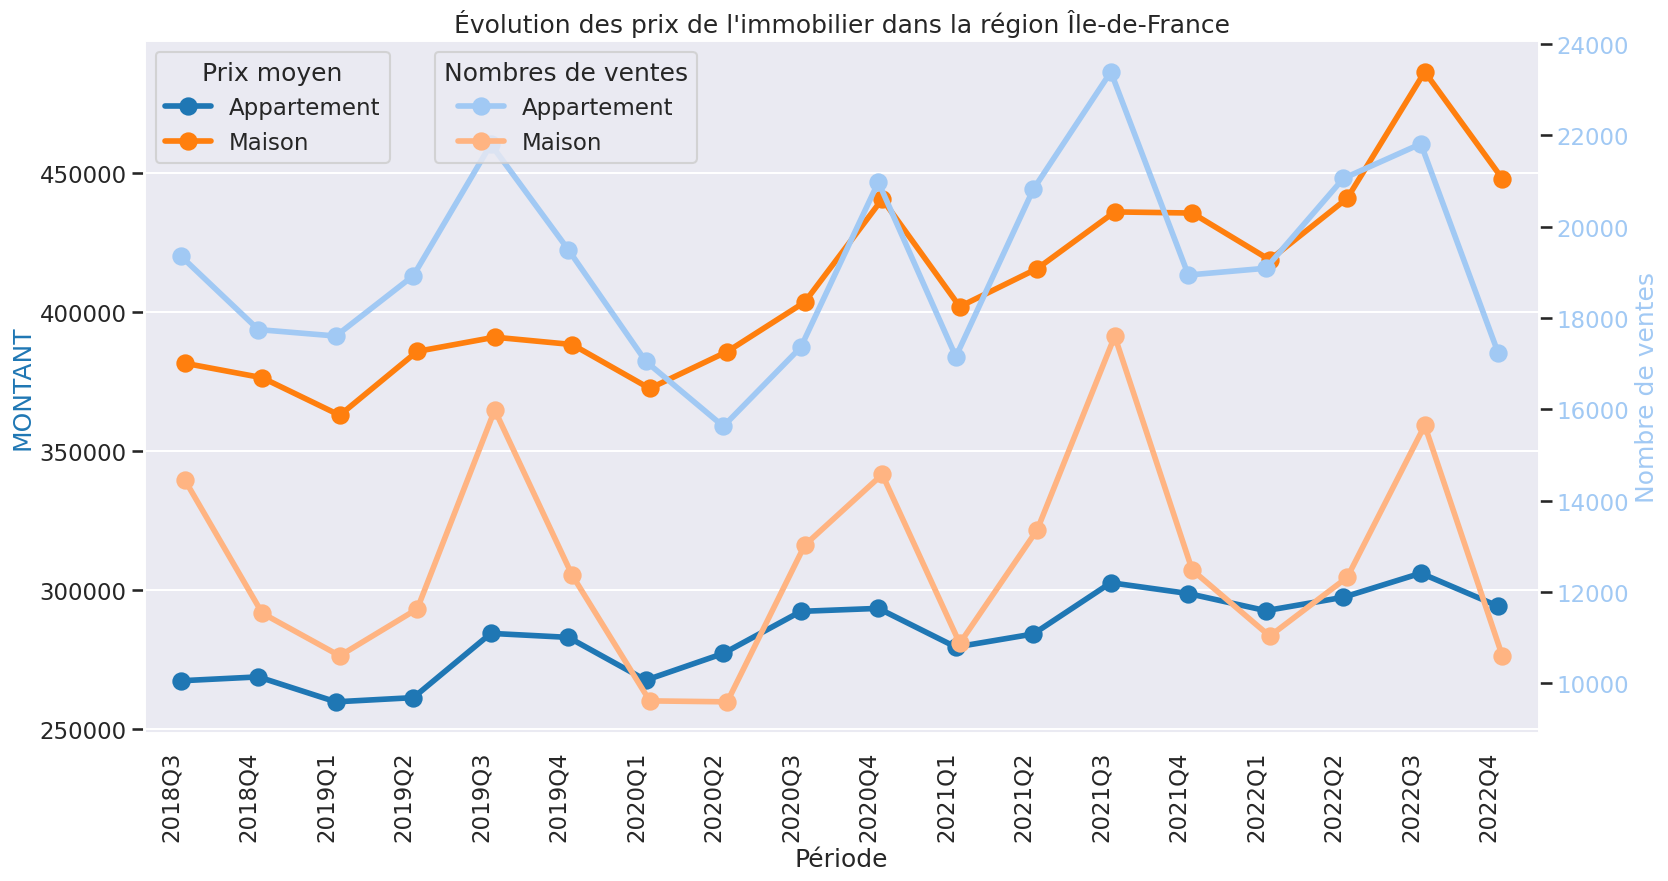

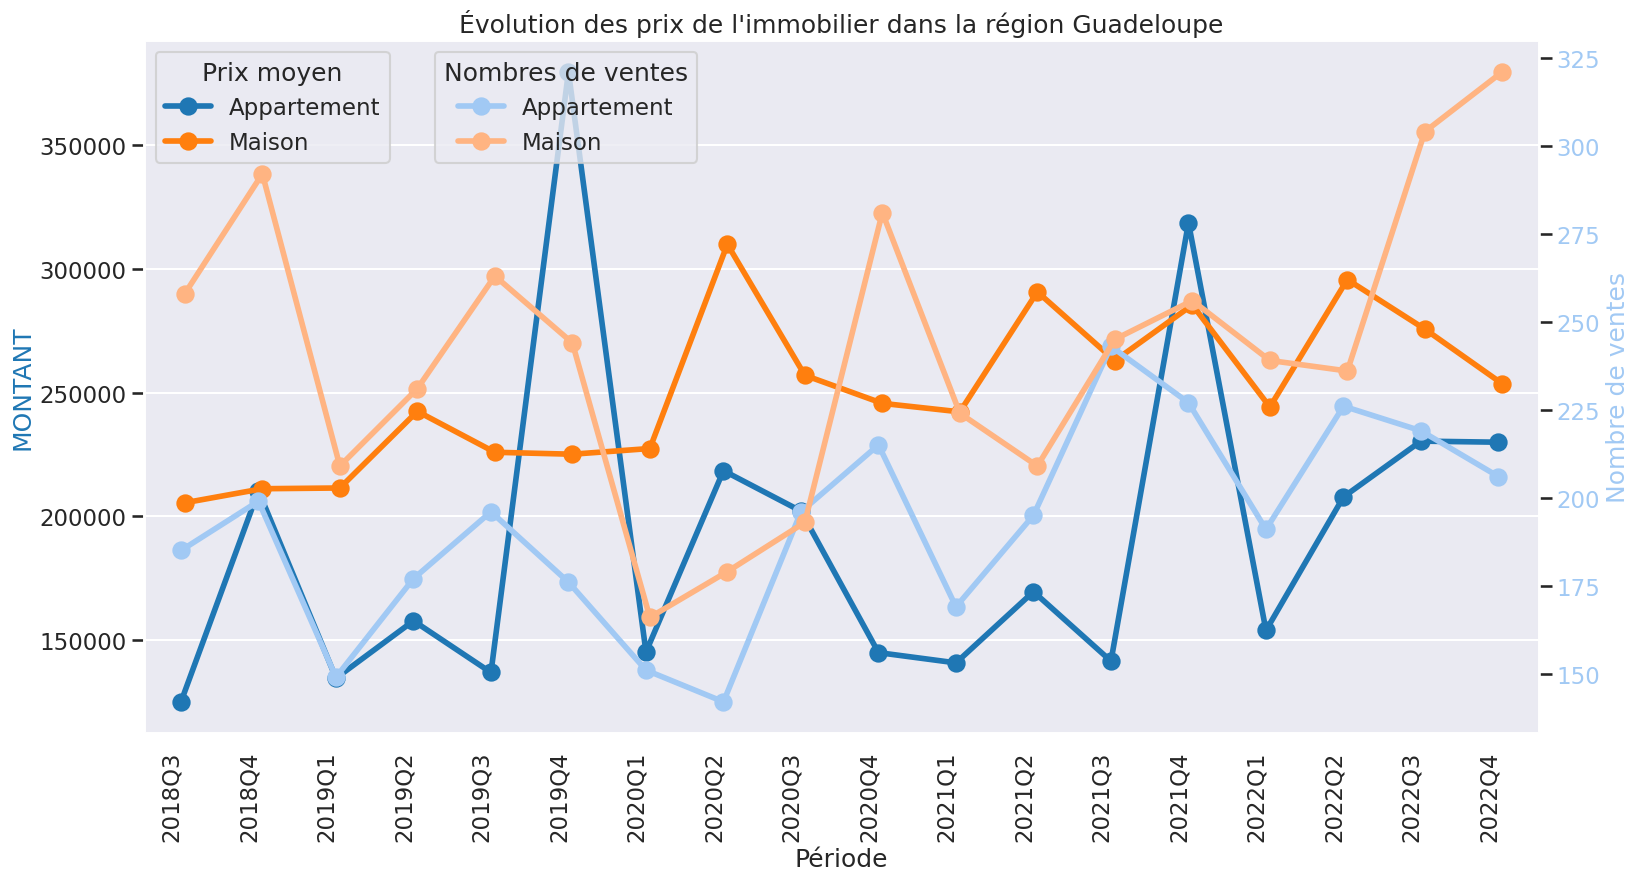

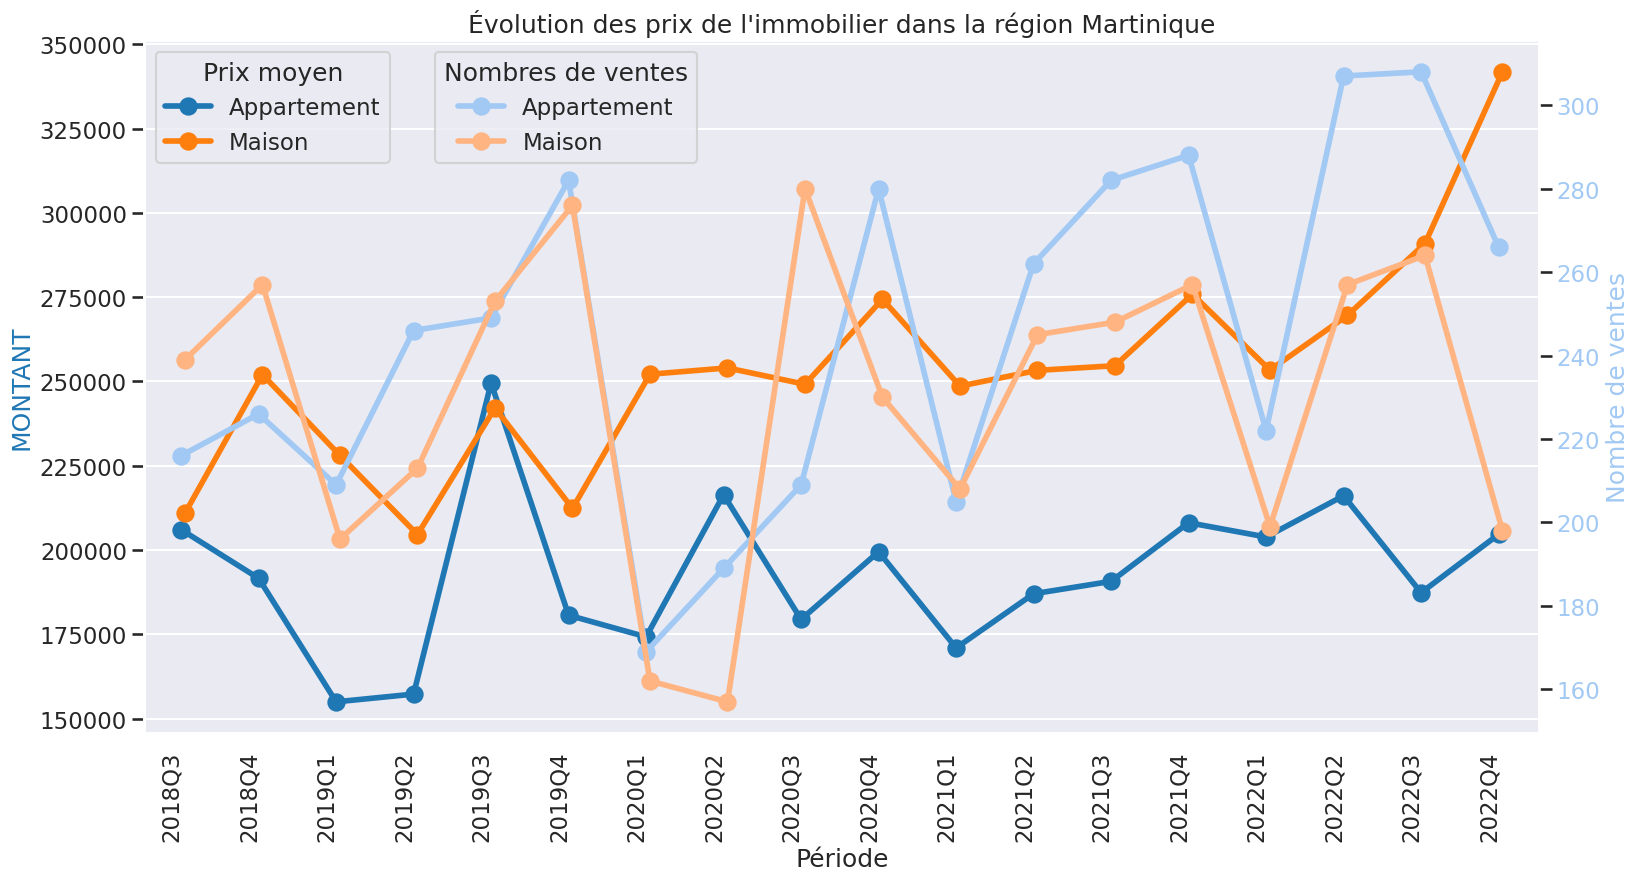

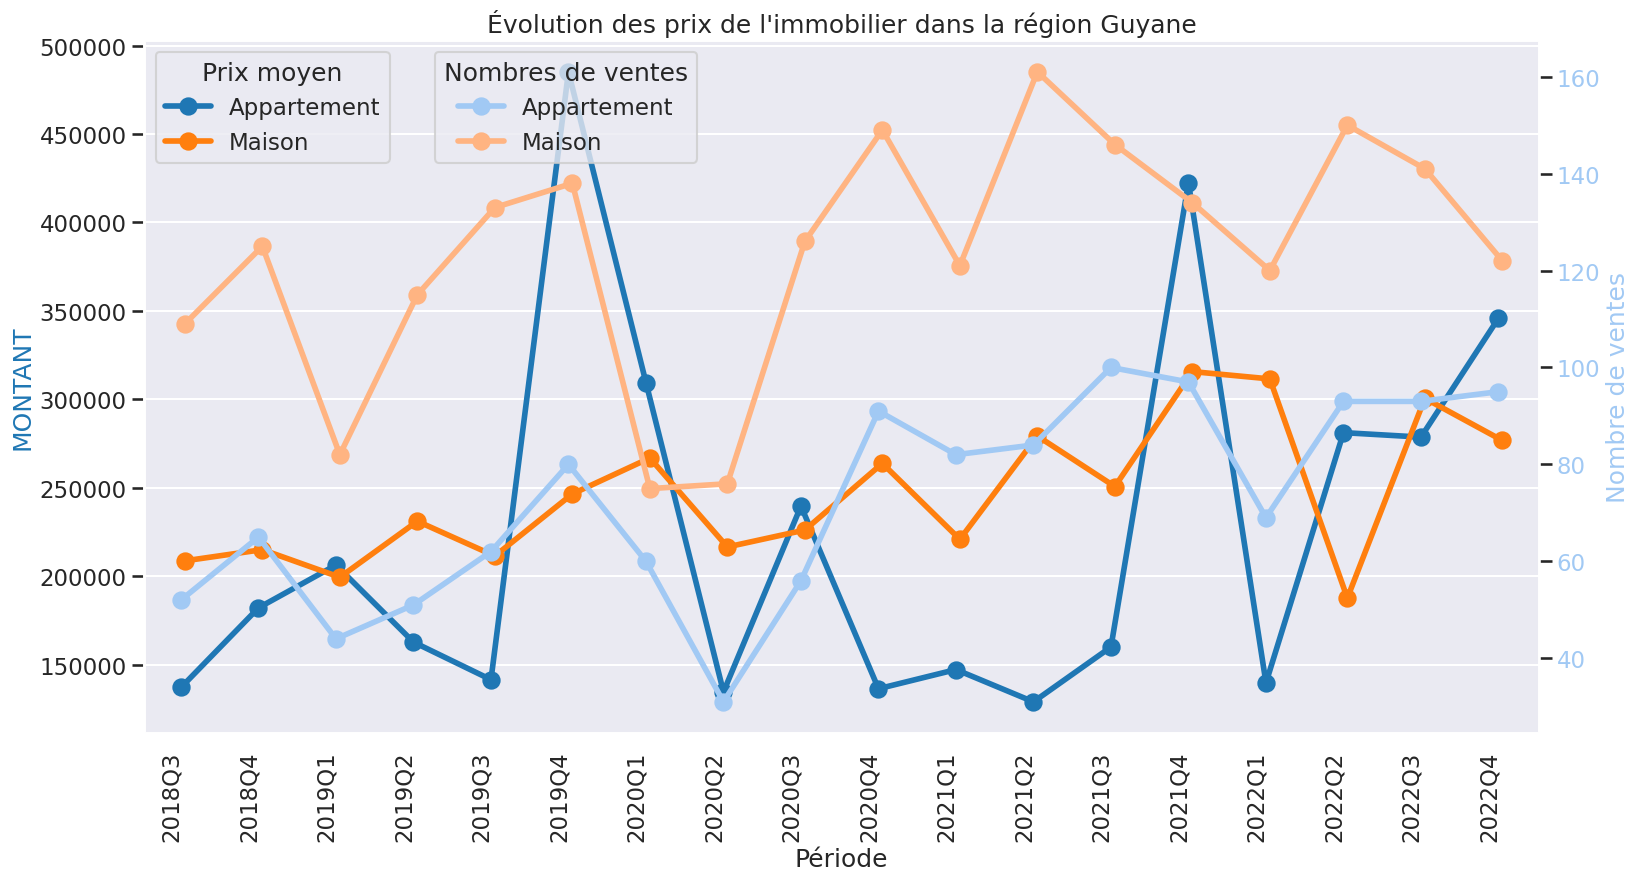

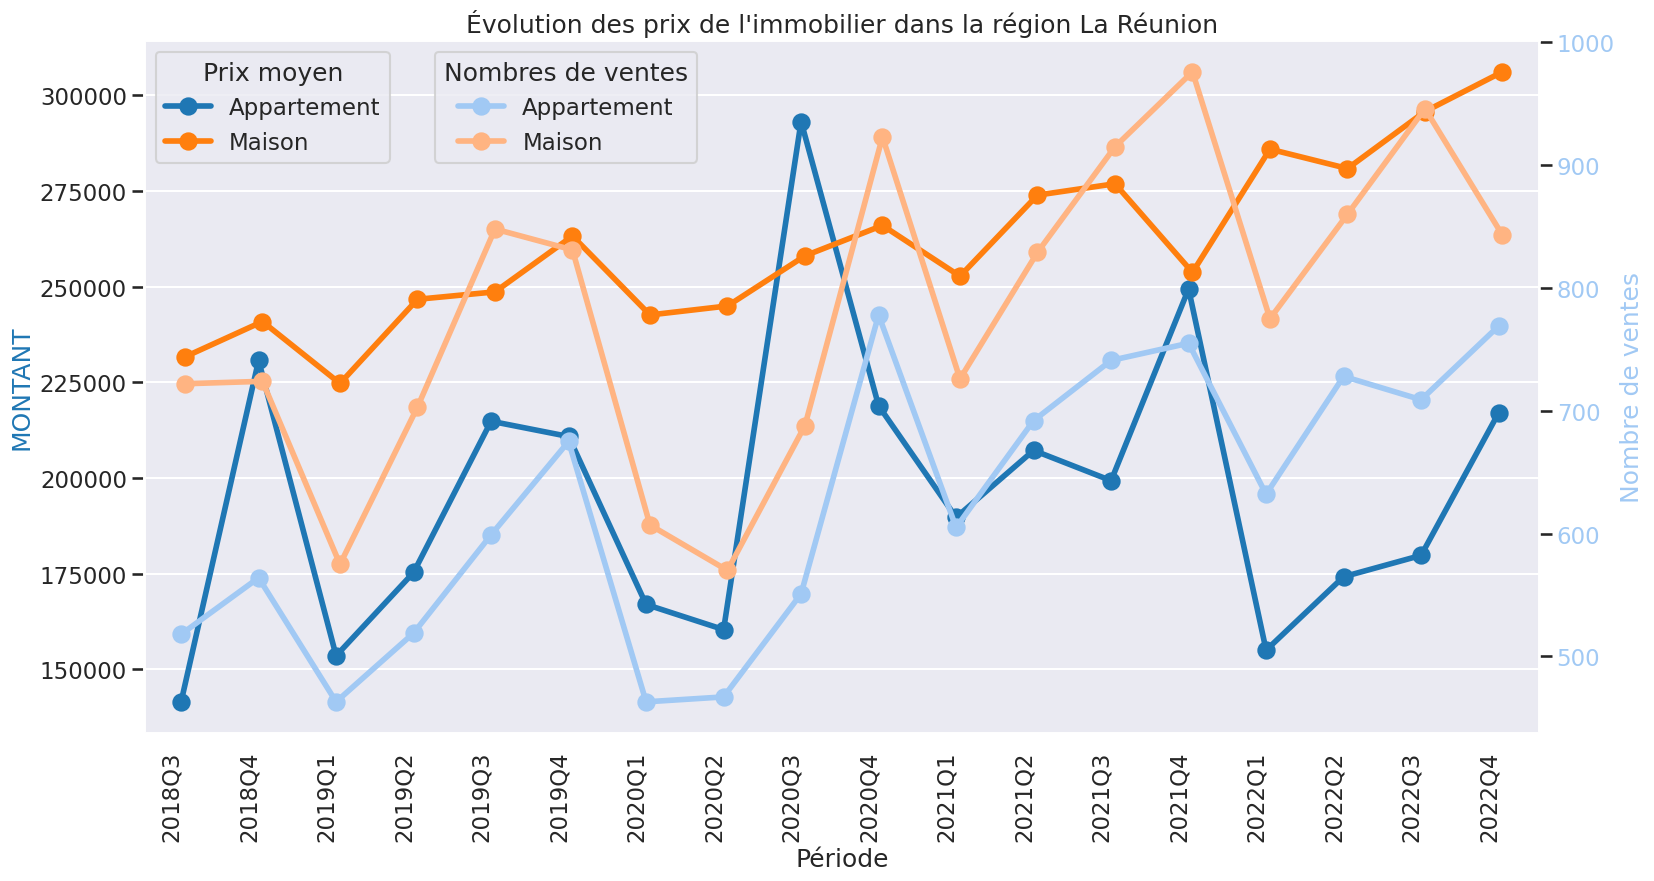

In [25]:
for region in liste_regions:
    # Sélection des données
    df_temp = df.loc[df.Name_region == region, ['Trimestre', 'NAME_TYPE_BIEN', 'MONTANT']]
    # Groupement sur la période et le type de bien, en ajoutant une colonne 'COUNT'
    df_temp = df_temp.groupby(['Trimestre', 'NAME_TYPE_BIEN']).agg(MONTANT=('MONTANT', 'mean'), COUNT=('MONTANT', 'count')).reset_index()
    # Tri du data frame par ordre croissant
    df_temp = df_temp.sort_values(by='Trimestre')

    fig, host = plt.subplots(figsize=(18, 9))
    par = host.twinx()

    host.set_xlabel("Période")
    host.set_ylabel("MONTANT")
    par.set_ylabel("Nombre de ventes")

    p1 = sns.pointplot(data=df_temp, x='Trimestre', y='MONTANT', hue='NAME_TYPE_BIEN',
                  dodge=True, markers='o', linestyles='-', ax=host)
    p2 = sns.pointplot(data=df_temp, x='Trimestre', y='COUNT', hue='NAME_TYPE_BIEN',
                  dodge=True, markers='o', linestyles='-', palette="pastel", ax=par)

    host.yaxis.get_label().set_color(p1.lines[0].get_color())
    par.yaxis.get_label().set_color(p2.lines[0].get_color())

    # Changer la couleur des nombres de ventes (labels de l'axe y de l'axe par)
    par.tick_params(axis='y', labelcolor=p2.lines[0].get_color())

    # Supprimer les lignes de grille
    host.xaxis.grid(False)
    par.yaxis.grid(False)

    # xlabels à la verticale
    xticklabels = df_temp['Trimestre'].unique()
    xticks_positions = range(len(xticklabels))
    
    host.set_xticks(xticks_positions)
    host.set_xticklabels(xticklabels, rotation=90, ha="right")

    # Titre
    host.set_title(f"Évolution des prix de l'immobilier dans la région {region}")

    # Légendes en dehors du graphique
    host.legend(loc='upper left', bbox_to_anchor=(0, 1), title='Prix moyen')
    par.legend(loc='upper left', bbox_to_anchor=(0.2, 1), title='Nombres de ventes')

    plt.show()

### Conclusion :
- On retrouve notre maison la plus cher dans l'evolution du prix dans la région Bretagne  
=> Regarder les prix sur la région Bretagne aux 1er et 2éme trimestre 2019 pour Nettoyage
- Les départements d'outre-mer pnt un volume très inférieur à ceux de métropole ce qui rend la moyenne de pris au trimestre beaucoup plus volatile.
- On peut visualiser le phénomène d'offres et de demandes, généralement le prix moyen d'un appartement ou d'une maison évolue de la même manière que le nombre de ventes
- Les prix moyen d'un bien est différent d'une région à l'autre  
=> La variable REGION peut être une variable intéressante pour la création d'un modèle
- Les prix peuvent également évoluer différemment entre un appartement et une maison  
=> Il sera préférable de faire un modèle pour les appartements et un modèle pour les maison pour plus de précision sur la prédiction.

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Baromètre des prix sur une carte</h1>
</div>
<br>

In [ ]:
import folium

# Pour des raisons de mémoire de l'ordinateur le baromètre des prix sera effectué par commune
# Les données seront groupées par ID_COMMUNE et la position GPS sera la moyenne des points de la commune
# Le prix sera donc également la moyenne sur la commune
# Pour des raisons d'affichage sur la carte il n'y aura que la métropole 

for type_bien in ["Maison","Appartement"]:
    # Sélection des données
    df_map = df.loc[(df.NAME_TYPE_BIEN==type_bien) & (~df.Name_region.isin(['Guadeloupe', 
                                                                            'Martinique', 
                                                                            'Guyane', 
                                                                            'La Réunion'])),
                     ["ID_COMMUNE","LONGITUDE", "LATITUDE", "MONTANT"]]

    # Groupement des données 
    df_map = df_map.groupby("ID_COMMUNE").agg({ "LONGITUDE": "mean",  
                                                        "LATITUDE": "mean",   
                                                        "MONTANT": "mean"
                                                        }).reset_index()
    # Point central de la carte
    carte = folium.Map(location=[df_map['LATITUDE'].mean(), df_map['LONGITUDE'].mean()], 
                        zoom_start=6)

    # Calcul des quartiles
    quartiles = df_map['MONTANT'].quantile([0, 0.25, 0.5, 0.75, 1]).astype(int)

    # Ajout de cercles sur la carte avec un code couleur en fonction des quartiles
    for index, row in df_map.iterrows():
        if row['MONTANT'] <= quartiles[0.25]:
            couleur = 'green'
        elif quartiles[0.25] < row['MONTANT'] <= quartiles[0.5]:
            couleur = 'orange'
        elif quartiles[0.5] < row['MONTANT'] <= quartiles[0.75]:
            couleur = 'red'
        else:
            couleur = '#8B0000'

        folium.CircleMarker(location=[row['LATITUDE'], row['LONGITUDE']], 
                            radius=1,  # Ajustez la taille du cercle selon vos besoins
                            color=couleur,
                            fill=True,
                            fill_color=couleur,
                            fill_opacity=0.7).add_to(carte)
        
    # Ajout de la légende avec des couleurs
    legend_html = """
         <div style="position: fixed; 
                     bottom: 50px; left: 50px; width: 400px; height: 74px; 
                     border:2px solid grey; z-index:9999; font-size:14px;
                     background-color:white; opacity: 0.8;
                     ">
         &nbsp; <b>Legend</b><br>

         <table>
            <tr>
            <td style="width: 100px; flex: 1;background-color: {}; text-align: center;color : black">0 - {}</td>
            <td style="width: 100px; flex: 1;background-color: {}; text-align: center;color : black">{} - {}</td>
            <td style="width: 100px; flex: 1;background-color: {}; text-align: center;color : black">{} - {}</td>
            <td style="width: 100px; flex: 1;background-color: {}; text-align: center;color : black"> > {} </td>
            </tr>
        </table>
         
         </div>
         """.format('green', quartiles[0.25], 
                    'orange', quartiles[0.25], quartiles[0.5],  
                    'red', quartiles[0.5], quartiles[0.75], 
                    '#8B0000', quartiles[0.75])

    carte.get_root().html.add_child(folium.Element(legend_html))

    # Enregistrement de la carte au format HTML
    carte.save(f"carte_prix_metropole_{type_bien}.html")

### Capture d'écran de la carte interactive réalisée avec folium
![Screenshoot map_france](https://raw.githubusercontent.com/rastakoer/certif_app_immo/model/model/map_france_folium.PNG)

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Evolution du prix en fonction de la surface d'un logement</h1>
</div>
<br>

In [ ]:
for type_bien in ["Maison","Appartement"]:

    # Sélection de la surface et du montant dans un data frame
    df_surface = df.loc[(df.MONTANT<=1000000) & (df.TYPE_BIEN==type_bien),
                        ["MONTANT","SURFACE_BATI"]]

    # Définition des bins pour les montants des ventes
    bins = [i for i in range(0,1050000,50000)]

    # Ajouter une colonne 'MontantVenteBin' au DataFrame en utilisant cut
    df_surface['MONTANT'] = pd.cut(df_surface['MONTANT'], bins=bins)


    plt.figure(figsize=(18, 9))
    sns.barplot(x='MONTANT', y='Surface', data=df_surface, estimator='mean', ci=None)
    if type_bien == "Maison":
        plt.title(f"Surface moyenne en fonctions du montant de la vente d'une Maison")
    else:
        plt.title(f"Surface moyenne en fonctions du montant de la vente d'un Appartement")
    plt.xlabel('Montant de vente')
    plt.ylabel('Surface moyenne')
    plt.show()



Coefficient de corrélation de Pearson (r) : Mesure la force et la direction d'une relation linéaire entre deux variables continues. Varie de -1 (corrélation négative parfaite) à 1 (corrélation positive parfaite). Une valeur de 0 indique aucune corrélation.

Coefficient de corrélation de Spearman (rho) : Mesure la force et la direction de la relation monotone entre deux variables, qu'elle soit linéaire ou non. Il est souvent utilisé pour les variables ordinales ou catégorielles ordinales.

Coefficient de corrélation de Kendall (tau) : Comme le coefficient de Spearman, mesure la force et la direction de la relation entre deux variables. Il est également utilisé pour les variables ordinales ou catégorielles ordinales, mais il tient compte du nombre de concordances et de discordances entre les paires d'observations.

spearman_correlation_matrix = df.corr(method='spearman')
print(spearman_correlation_matrix)


Trouver un graphique et ou une methode pour visualiser l'evolution du prix en fonctin de la surface
graphique de distibution
matrice de correlation ...